# 1. Import packages


In [54]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Download stock price


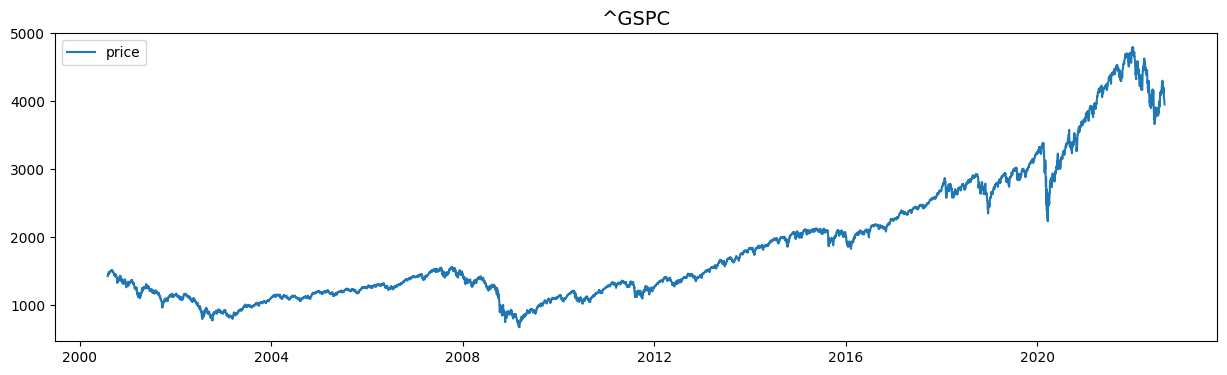

In [55]:
stock = '^GSPC'
date_0 = '2000-08-01'
date_1 = '2022-09-01'
date_2 = '2022-10-01'

data = yf.Ticker(stock).history(start=date_0, end=date_1)
price = data['Close']
x = np.array(price)

data2 = yf.Ticker(stock).history(start=date_0, end=date_2)
price2 = data2['Close']
x2 = np.array(price2)

# data = yf.Ticker(stock).history(period='5y').reset_index()
# train = data['Close'][:200]
# price = train
# x = np.array(price)
# test = data['Close'][200:]
# price2 = test
x2 = np.array(price2)
pl.plt.figure(figsize=(15,4))
# pl.plot(train,label='train')
# pl.plot(test,label='test')
pl.plot(price,label='price')
pl.title(stock, fontsize=14)
pl.legend()
pl.show()

In [56]:
# date_0 = '2022-02-04'
# date_1 = '2022-11-18'
# date_2 = '2023-02-03'
# stock = "^GSPC"

# data = yf.Ticker(stock).history(start=date_0, end=date_1)
# price = data['Close']
# x = np.array(price)

# data2 = yf.Ticker(stock).history(start=date_0, end=date_2)
# price2 = data2['Close']
# x2 = np.array(price2)
# pl.plt.figure(figsize=(15,4))
# pl.plot(price,label='price')
# pl.title(stock, fontsize=14)
# pl.legend()
# pl.show()

# 3. Count predict days


n_predict =  5579
n_x =  5558


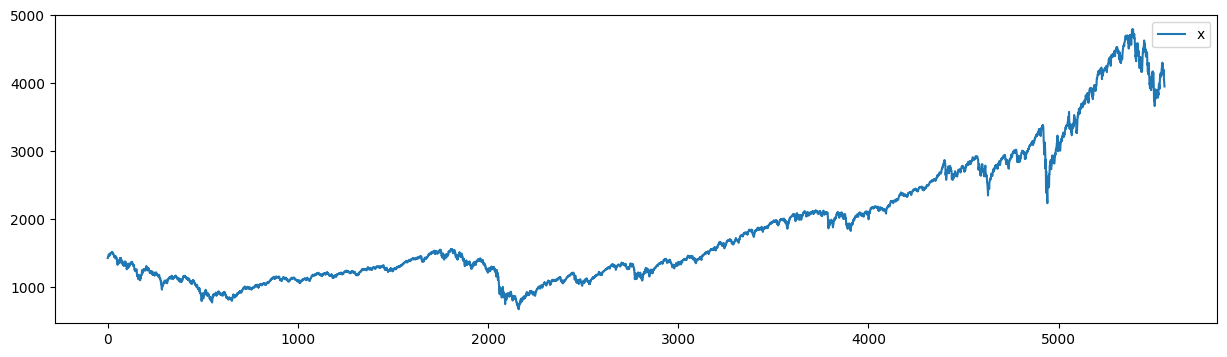

In [57]:
n_predict = price2.size
print('n_predict = ', n_predict)
n_x = x.size
print('n_x = ', n_x)
n_harm = 10                # number of harmonics in model
t = np.arange(0, n_x)
p = np.polyfit(t, x, 1)         # find linear trend in x

x_notrend = x - p[0] * t        # detrended x
pl.plt.figure(figsize=(15,4))
plt.plot(x,label='x')
# plt.plot(x_notrend,label='x_notrend')
pl.legend()
pl.show()


# 4. FFT


(array([   1,    2,    3, ..., 2776, 2777, 2778], dtype=int32),)


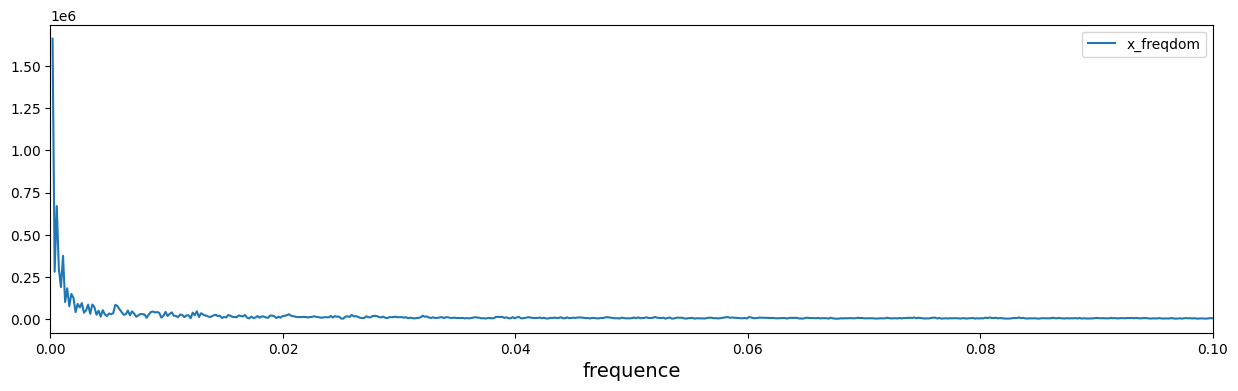

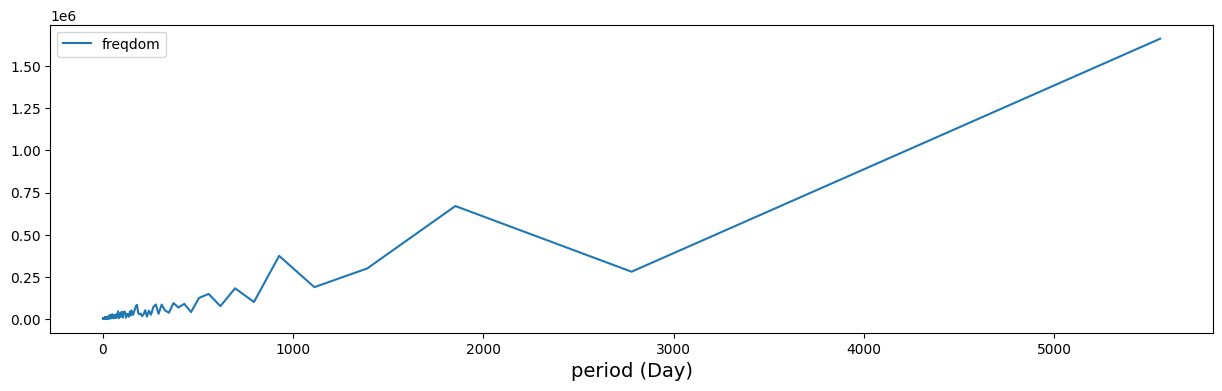

In [58]:
x_freqdom = fft.fft(x_notrend,n = n_x)        
f = fft.fftfreq(n_x)

mask = np.where(f > 0)
print(mask)
pl.plt.figure(figsize=(15,4))
pl.plot(f[mask], abs(x_freqdom[mask]) ,label="x_freqdom")
pl.xlim(0,0.1)
pl.xlabel('frequence', fontsize=14)
pl.legend()
pl.show()

pl.plt.figure(figsize=(15,4))
pl.plot(1/f[mask], abs(x_freqdom[mask]) , label="freqdom")
pl.xlabel('period (Day)', fontsize=14)
pl.legend()
pl.show()

In [59]:
f_positive = f[np.where(f > 0)]
f_positive.size
x_freqdom_positive = x_freqdom[np.where(f > 0)]
x_freqdom_positive.size

2778

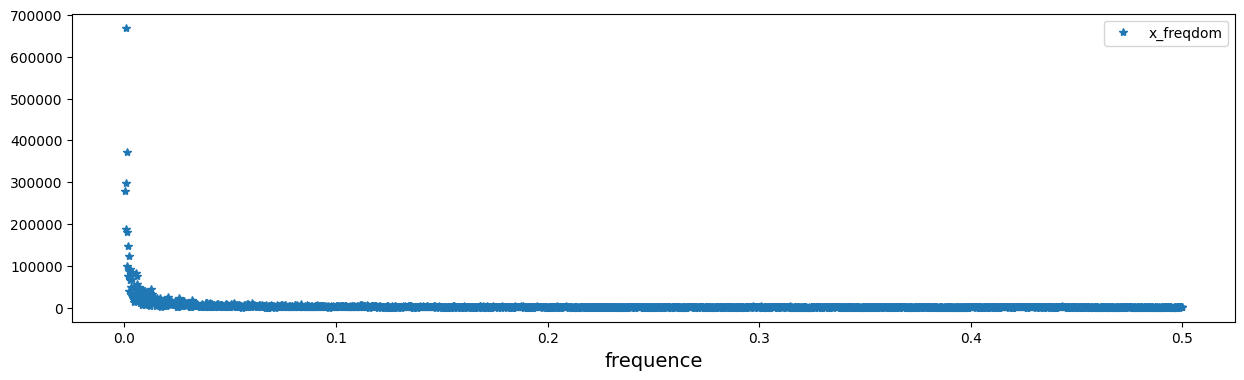

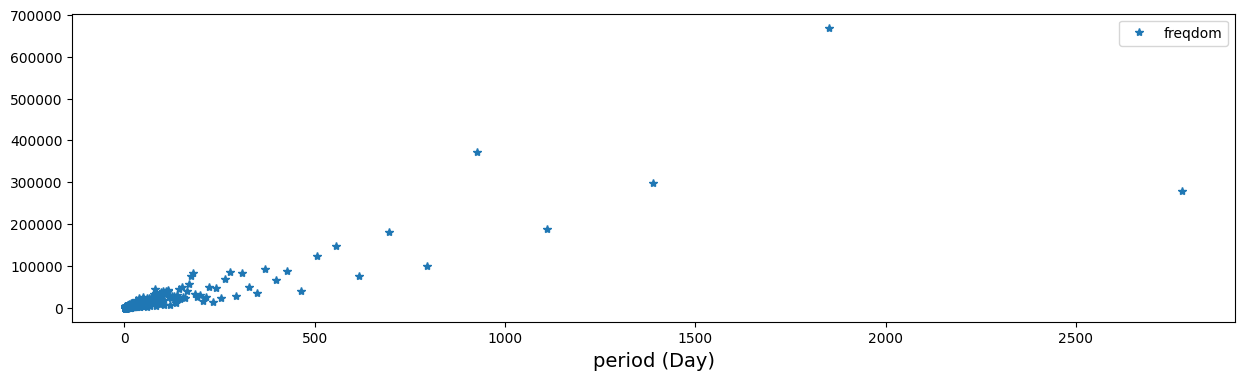

In [60]:
pl.plt.figure(figsize=(15,4))
pl.plot(f_positive[1:], abs(x_freqdom_positive[1:]),'*' ,label="x_freqdom")
# pl.xlim(-0.1,0.1)
pl.xlabel('frequence', fontsize=14)
pl.legend()
pl.show()

pl.plt.figure(figsize=(15,4))
pl.plot(1/f_positive[1:], abs(x_freqdom_positive[1:]),'*' , label="freqdom")
pl.xlabel('period (Day)', fontsize=14)
pl.legend()
pl.show()

# 5. Sort index by frequency or by amplitudes


In [61]:
indexes = list(range(f_positive.size))             # frequencies

# indexes.sort(key = lambda i: f_positive[i])  # sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(x_freqdom_positive[i]))  # sort indexes by amplitudes, lower -> higher 
indexes.reverse() # sort indexes by amplitudes, higher -> lower 
# indexes

# 6. Restore siganl


0
Period : 3
ampli : 120.46684627585027
fequence :  3.0
1
Period : 6
ampli : 67.20840029984542
fequence :  6.0
2
Period : 4
ampli : 53.76520145221586
fequence :  3.9999999999999996
3
Period : 2
ampli : 50.26814703375701
fequence :  1.9999999999999998
4
Period : 5
ampli : 33.75387247265039
fequence :  4.999999999999999
5
Period : 8
ampli : 32.529737238476606
fequence :  7.999999999999999
6
Period : 10
ampli : 26.49755529495523
fequence :  9.999999999999998
7
Period : 11
ampli : 22.29157028012746
fequence :  10.999999999999998
8
Period : 7
ampli : 17.878992479549545
fequence :  7.0


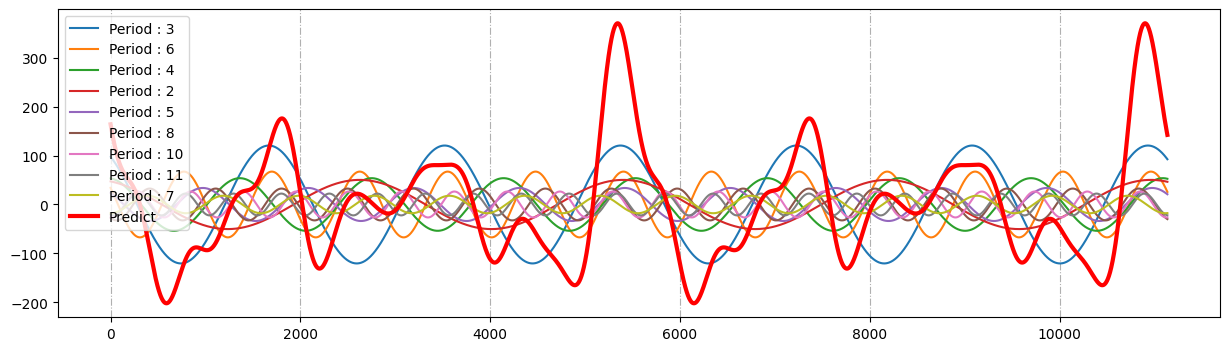

In [62]:
t = np.arange(0, n_x + n_predict)
restored_sig = np.zeros(t.size)
count = 0
ampli_list = []
phase_list = []
f_list = []
period_list = []
pl.plt.figure(figsize=(15,4))
for i in indexes[1 : n_harm]:   
    ampli = np.absolute(x_freqdom_positive[i]) / n_x   # amplitude
    phase = np.angle(x_freqdom_positive[i])            # phase
    signal = ampli * np.cos(2 * np.pi * f_positive[i] * t + phase)
    restored_sig += signal
    num = int(count)
    sig_num = 'signal_' + str(num) 
    # sig_period = 'Period : ' + str(round(1/f_positive[i],1)) + '(Days)'
    sig_period = 'Period : ' + str(round(n_x*f_positive[i]))


    ampli_list.append(ampli)
    phase_list.append(phase)
    f_list.append(f_positive[i])
    print(num)
    period_list.append(sig_period)
    print(sig_period)
    print('ampli :', ampli)
    print('fequence : ' ,n_x*f_positive[i])
    
    # fig, axes = plt.subplots(2, 1, figsize=(12, 6))
    # axes[0].plot(signal, 'b')
    # axes[0].set_xlabel(sig_period)
    # axes[1].plot(restored_sig, 'r',label = 'restored_sig')
    # axes[1].set_xlabel(sig_num)
    # pl.legend()
    # plt.tight_layout()
    # plt.show()
    pl.plot(t, signal,label=sig_period)
    count += 1
        
signal = restored_sig
 
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
# pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
pl.plot(t, signal, 'r',label = 'Predict',linewidth=3)
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

signal_df = pd.DataFrame({
    'ampli' :ampli_list,
    'phase' :phase_list,
    'f' : f_list,
    'period' : period_list
})

# 7. Plot predicting


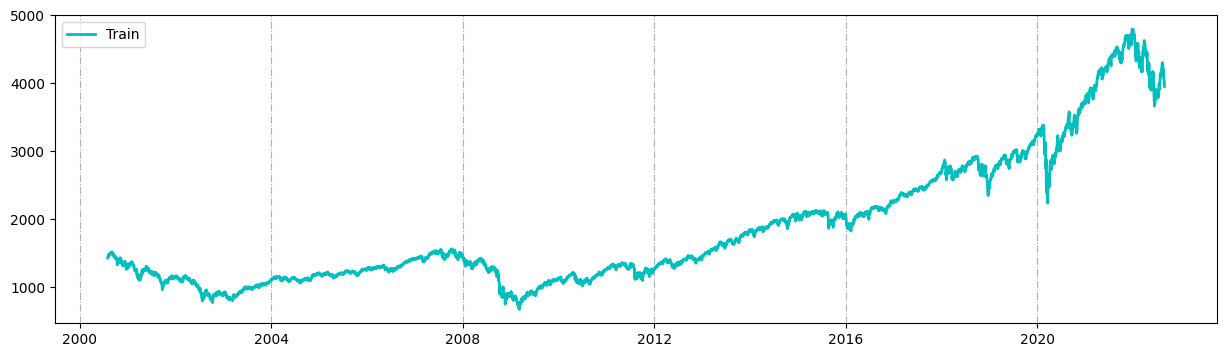

In [63]:
# x_notrend2 = x - p[0] * np.arange(0, n_x)
pl.plt.figure(figsize=(15,4)) 
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
# pl.plot(price2.index, signal, 'r',label = 'Predict')
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

In [64]:
# tail_data = price2.size - n_predict*2
# print(tail_data)
# pl.plt.figure(figsize=(15,4))
# pl.plot(price2[tail_data:].index, x2[tail_data:], 'b', linewidth = 3,label = 'Data')
# pl.plot(price[tail_data:].index, x[tail_data:], 'c', linewidth = 2, label = 'Train')
# # pl.plot(price2[tail_data:].index, signal[tail_data:], 'r',label = 'Predict')
# pl.plt.grid(axis='x',linestyle='-.')
# plt.plot(price.index,price,'r',label='original values')
# # plt.xlabel('x axis')
# # plt.ylabel('y axis')
# plt.legend(loc=4)
# # plt.title('polyfitting')
# # plt.show()
# pl.legend()
# pl.show()

# 8. Count peaks and valleys

In [65]:
pv_range = 2

pd.options.mode.chained_assignment = None
pv = data2['Close']
data2['peaks'] = pd.Series(dtype='float64') 
data2['valleys'] = pd.Series(dtype='float64') 
peaks = data2['peaks']
valleys = data2['valleys']

for idx in range(0, len(pv)):
    if pv[idx] == pv.iloc[idx-pv_range:idx+pv_range].max():
        peaks.iloc[idx] = pv[idx]
    if pv[idx] == pv.iloc[idx-pv_range:idx+pv_range].min():
        valleys.iloc[idx] = pv[idx]
        
data2['signal'] = signal
pv2 = data2['signal']
data2['peaks2'] = pd.Series(dtype='float64') 
data2['valleys2'] = pd.Series(dtype='float64') 
peaks2 = data2['peaks2']
valleys2 = data2['valleys2']

for idx in range(0, len(pv)):
    if pv2[idx] == pv2.iloc[idx-pv_range:idx+pv_range].max():
        peaks2.iloc[idx] = pv2[idx]
    if pv2[idx] == pv2.iloc[idx-pv_range:idx+pv_range].min():
        valleys2.iloc[idx] = pv2[idx]

ValueError: Length of values (11137) does not match length of index (5579)

# 9. Count delays of peaks and valleys

In [ ]:
import datetime
data3 = pd.DataFrame()
data3['peaks_1'] = data2['peaks']
data3 = data3.dropna(how='all') 
li_peak1 = list(data3['peaks_1'].index)
data4 = pd.DataFrame()
data4['peaks_2'] = data2['peaks2']
data4 = data4.dropna(how='all') 
li_peak2 = list(data4['peaks_2'].index)
li_peak = []
for i in range(0,len(li_peak2)): 
    temp = []
    temp2 = []
    temp_abs = []
    for j in range(0,len(li_peak1)): 
        temp.append((li_peak1[j] - li_peak2[i]).days)
        temp_abs.append(abs(li_peak1[j] - li_peak2[i]).days)
    for k in range(0,len(temp_abs)):
        if temp_abs[k] == min(temp_abs) : 
            temp2 = temp[k]
    li_peak.append(temp2)
data4['delay'] = li_peak

data5 = pd.DataFrame()
data5['valleys_1'] = data2['valleys']
data5 = data5.dropna(how='all') 
li_valley1 = list(data5['valleys_1'].index)
data6 = pd.DataFrame()
data6['valleys_2'] = data2['valleys2']
data6 = data6.dropna(how='all') 
li_valley2 = list(data6['valleys_2'].index)
li_valley = []
for i in range(0,len(li_valley2)): 
    temp = []
    temp2 = []
    temp_abs = []
    for j in range(0,len(li_valley1)): 
        temp.append((li_valley1[j] - li_valley2[i]).days)
        temp_abs.append(abs(li_valley1[j] - li_valley2[i]).days)
    for k in range(0,len(temp_abs)):
        if temp_abs[k] == min(temp_abs) : 
            temp2 = temp[k]
    li_valley.append(temp2)
data6['delay'] = li_valley


# 10.1 plot prices and signals

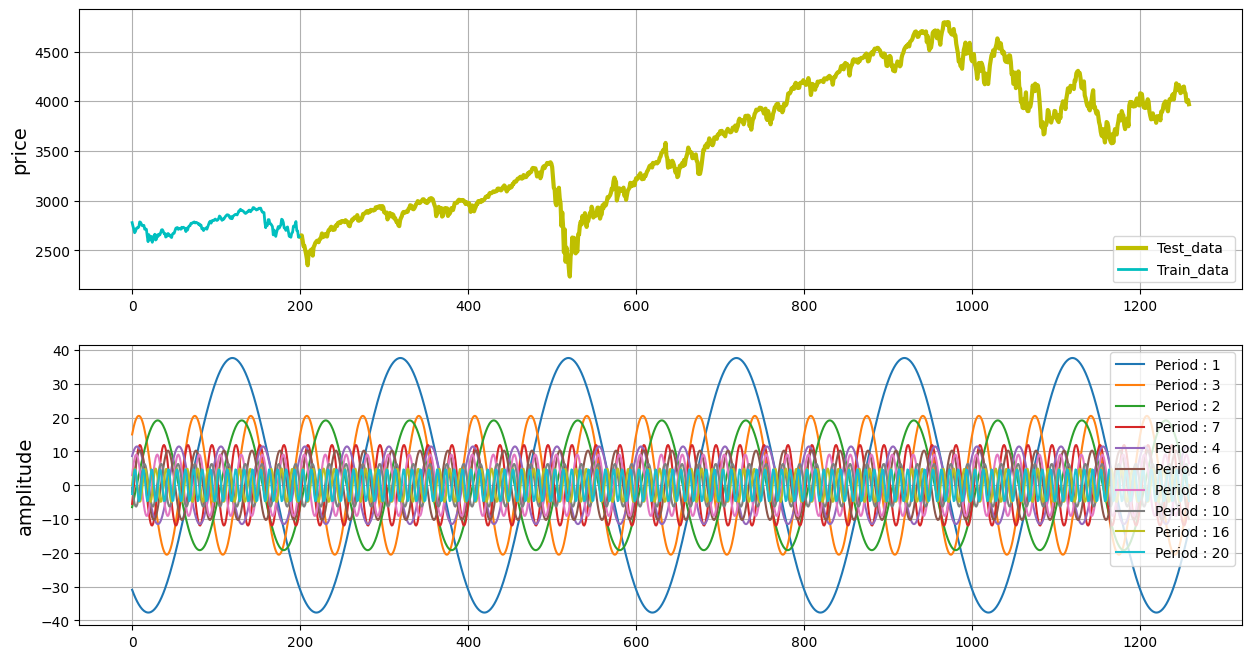

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
# axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
# axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# for i, label in enumerate(li_peak):
#     axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(t,signal2,label=signal_df['period'].at[i])
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=0)
# pl.legend()
plt.show()


# 10.2 plot prices and signals and re_signal

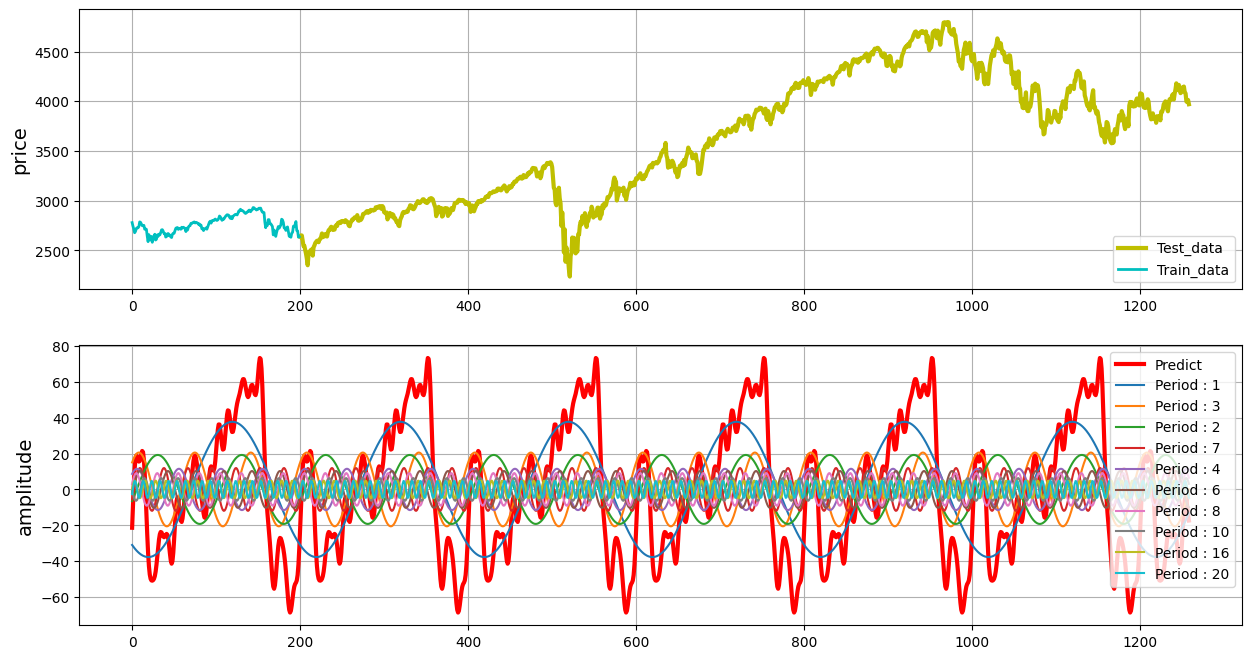

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(t, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
# axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# for i, label in enumerate(li_peak):
#     axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(t,signal2,label=signal_df['period'].at[i])
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=0)
# pl.legend()
plt.show()


# 10.3 plot peaks and vallys

In [ ]:
# fig, axes = plt.subplots(2, 1, figsize=(15, 8))
# axes[0].plot(price2.index, x2, 'b', linewidth=3, label='Test_data')
# axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
# axes[0].set_ylabel("price", fontsize=14)
# axes[0].grid(True)
# axes[1].plot(price2.index, signal, 'r', label='Predict')
# axes[1].grid(True)
# axes[1].set_ylabel("amplitude", fontsize=14)
# # axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='polyfit values')
# axes[0].plot(valleys.index,valleys,'*',label='polyfit values')
# axes[1].plot(peaks2.index,peaks2,'*',label='polyfit values')
# axes[1].plot(valleys2.index,valleys2,'*',label='polyfit values')

# plt.legend(loc=4)
# pl.legend()
# plt.show()


# 10.4 plot peaks and delays

ValueError: x and y must have same first dimension, but have shapes (1059,) and (1259,)

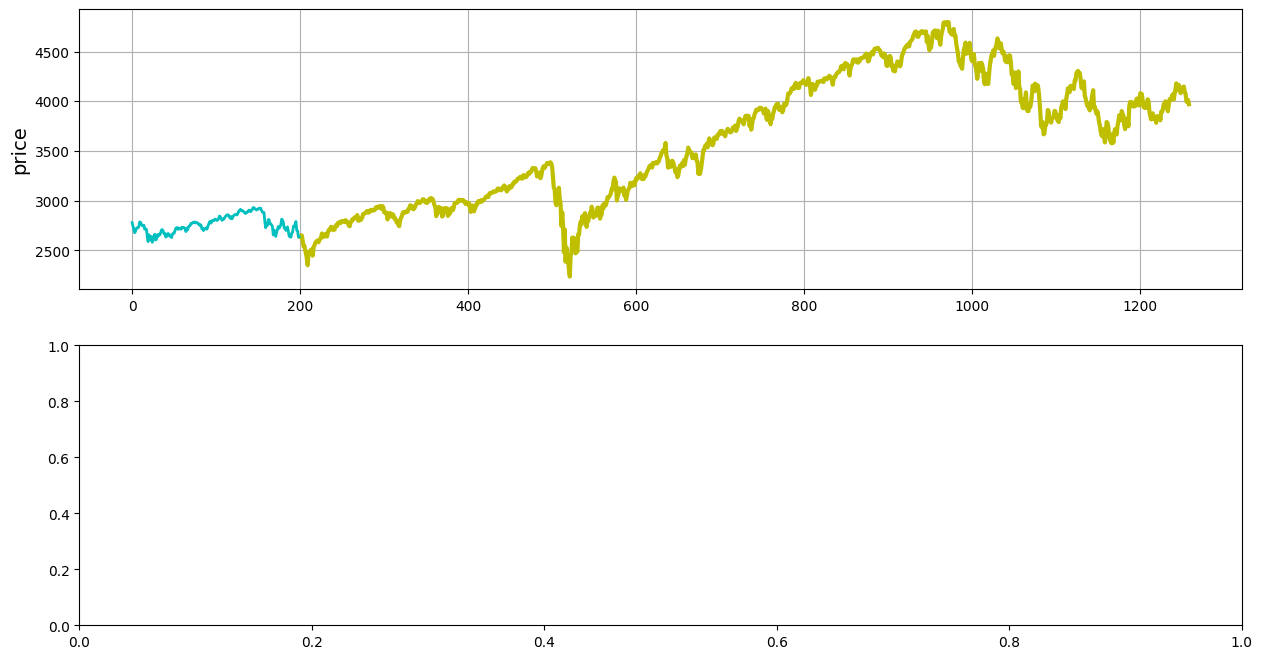

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.5 plot valleys and delays


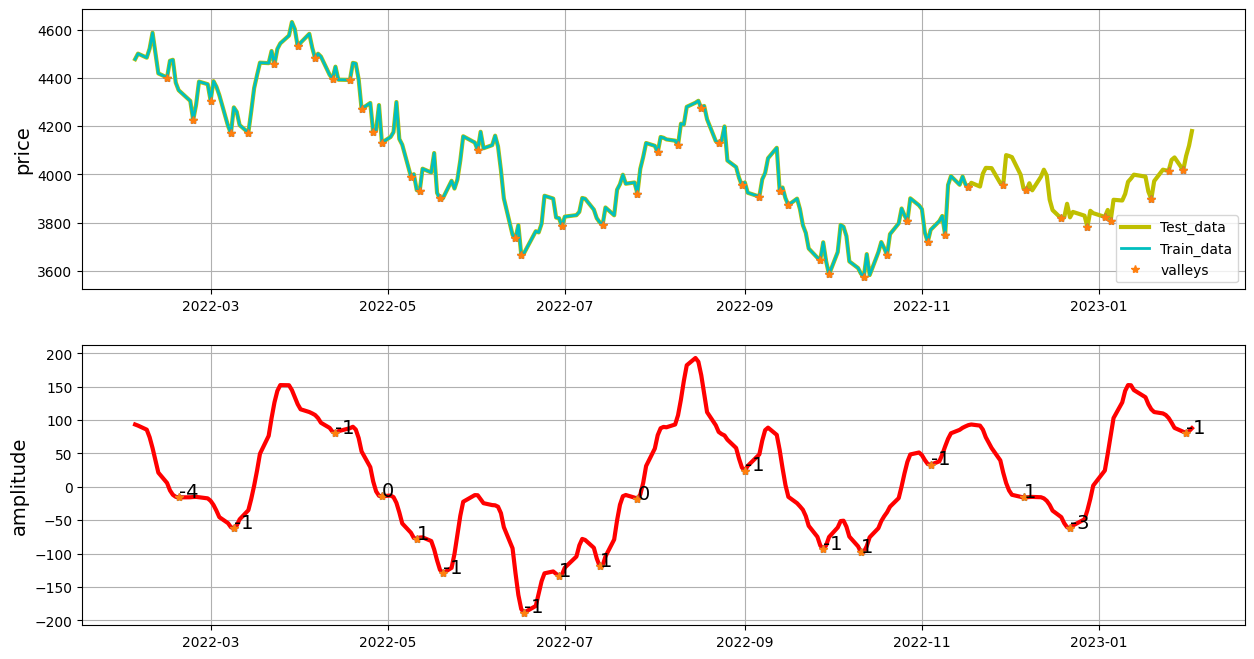

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(valleys.index,valleys,'*')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data6.index , data6['valleys_2'],'*')
axes[1].plot(valleys2.index,valleys2,'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.6 plot peaks and valleys and delays

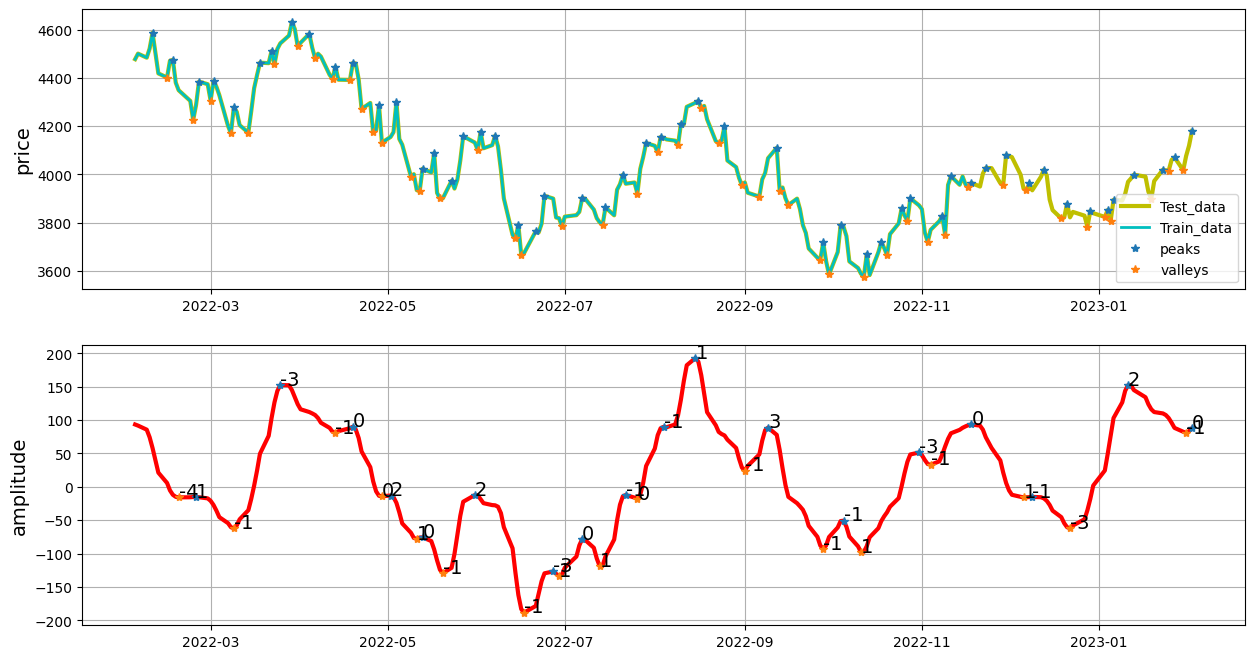

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.7 plot all

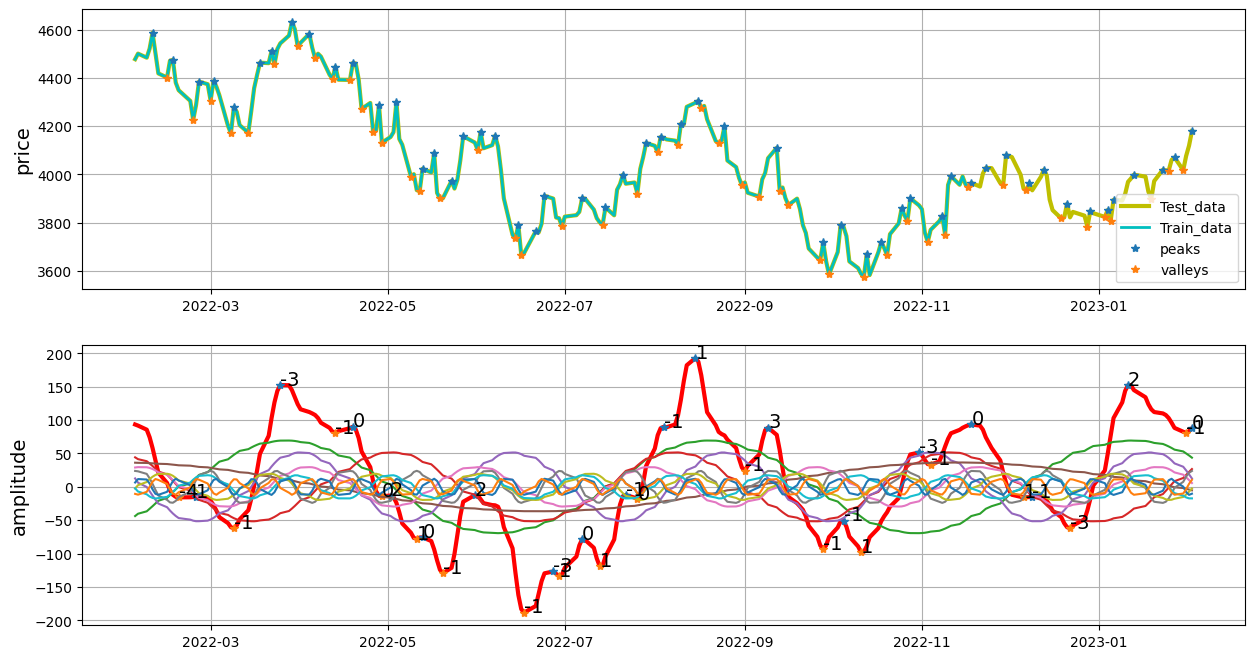

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(price2.index,signal2)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


In [ ]:
df = pd.DataFrame()
df.index = price2.index
df['signal'] = signal
df = df.drop(df[df.index < date_1].index)

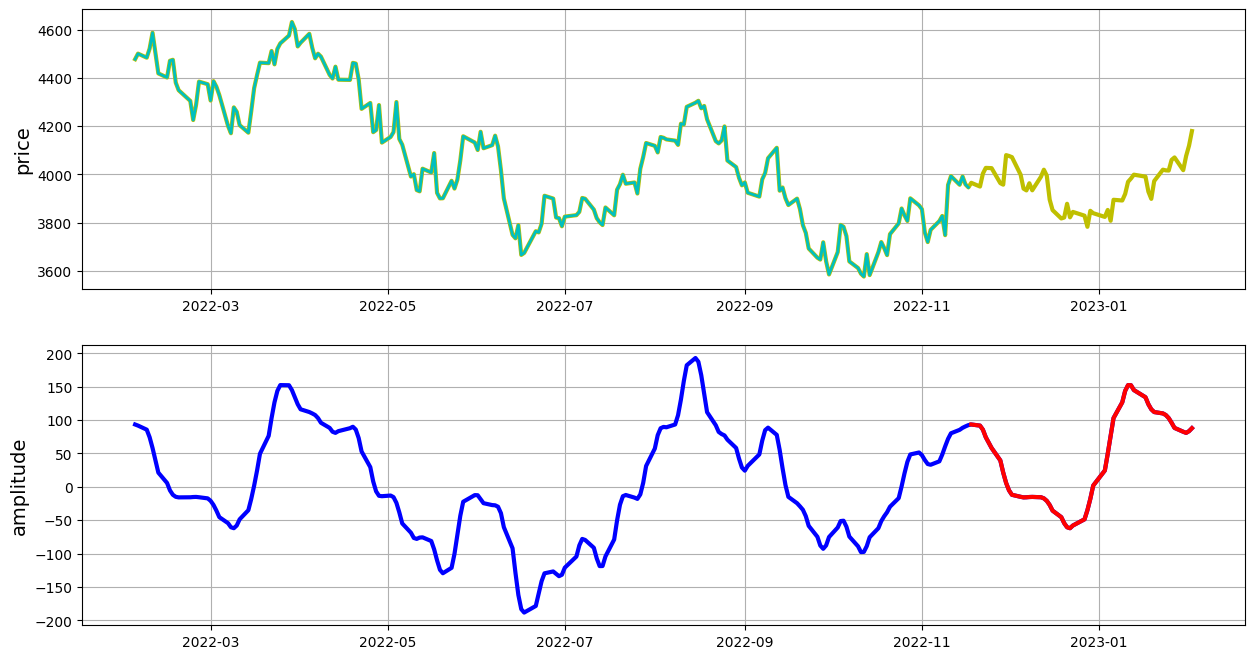

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'b', label='Predict',linewidth=3)
axes[1].plot(df.index, df['signal'], 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
# axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# for i, label in enumerate(li_peak):
#     axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# for i in range(0,len(signal_df)):
#     signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
#     axes[1].plot(price2.index,signal2)
# plt.show()
# plt.legend(loc=4)
# axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
# axes[0].set_title('date_0 = 2005-01-01 date_1 = 2010-01-01 date_2 = 2022-01-01' , fontsize=18)
plt.show()


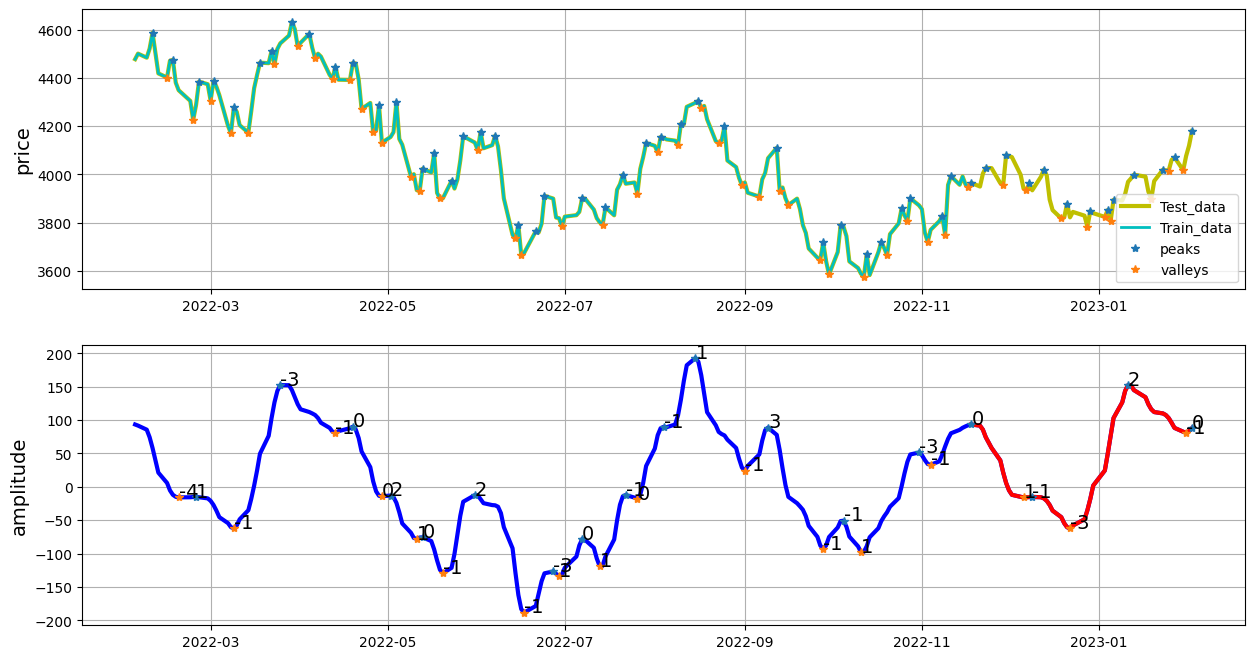

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'b', label='Predict',linewidth=3)
axes[1].plot(df.index, df['signal'], 'r', label='Predict',linewidth=3)

axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# for i in range(0,len(signal_df)):
#     signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
#     axes[1].plot(price2.index,signal2)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


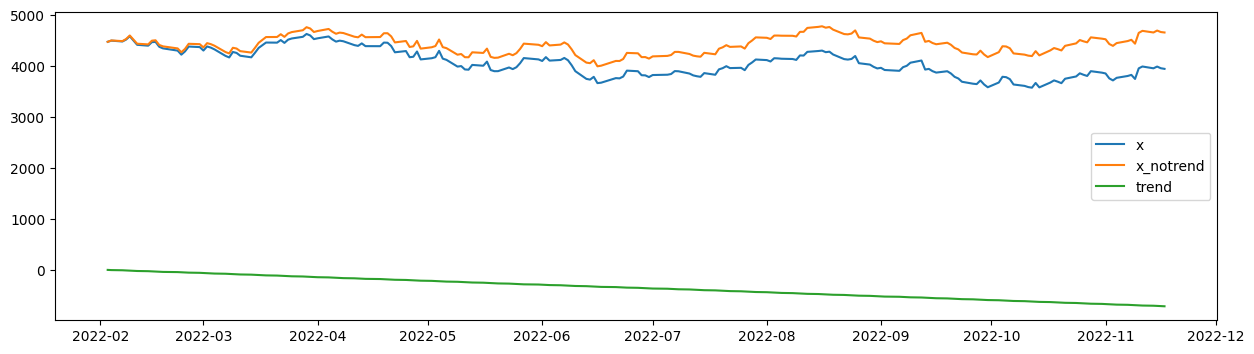

In [ ]:
t = np.arange(0, n_x)
x = np.array(price)
x_notrend = x - p[0] * t        # detrended x
pl.plt.figure(figsize=(15,4))
plt.plot(price.index,x,label='x')
plt.plot(price.index,x_notrend,label='x_notrend')
plt.plot(price.index,p[0] * t,label='trend')
pl.legend()
pl.show()